In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)

In [9]:
y_train.shape

(50000,)

In [10]:
y_test.shape

(10000, 1)

In [11]:
y_test = y_test.reshape(-1,)

In [12]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [13]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

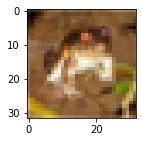

In [14]:
plt.figure(figsize=(12,2))
plt.imshow(x_train[0])

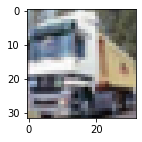

In [15]:
plt.figure(figsize=(12,2))
plt.imshow(x_train[1])

In [16]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [17]:
ann = models.Sequential([layers.Flatten(input_shape=(32,32,3)),layers.Dense(4000,activation='relu'),layers.Dense(2000,activation='relu'),layers.Dense(10,activation='sigmoid')])

In [18]:
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 224s 143ms/step - loss: 28.6433 - accuracy: 0.1048
Epoch 2/10
1563/1563 [==============================] - 220s 141ms/step - loss: 2.3038 - accuracy: 0.0990
Epoch 3/10
1563/1563 [==============================] - 222s 142ms/step - loss: 2.3027 - accuracy: 0.1007
Epoch 4/10
1563/1563 [==============================] - 217s 139ms/step - loss: 2.3030 - accuracy: 0.0971
Epoch 5/10
1563/1563 [==============================] - 215s 138ms/step - loss: 2.3027 - accuracy: 0.0981
Epoch 6/10
1563/1563 [==============================] - 215s 137ms/step - loss: 2.3027 - accuracy: 0.0975
Epoch 7/10
1563/1563 [==============================] - 216s 138ms/step - loss: 2.3027 - accuracy: 0.0973
Epoch 8/10
1563/1563 [==============================] - 230s 147ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 9/10
1563/1563 [==============================] - 236s 151ms/step - loss: 2.3026 - accuracy: 0.0982
Epoch 10/10
1563/1563 [======================

In [20]:
### build a cnn
cnn = models.Sequential([layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                         layers.MaxPooling2D(2,2),layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                        layers.MaxPooling2D(2,2),layers.Dropout(0.2),layers.Flatten(),layers.Dense(256,activation='relu'),
              layers.Dense(128,activation='relu'),
                         layers.Dense(64,activation='relu'),
                        layers.Dense(32,activation='relu'),
                        layers.Dense(10,activation='softmax')])

In [21]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
x_train = x_train/255
x_test = x_test/255

In [23]:
cnn.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 94s 59ms/step - loss: 1.5588 - accuracy: 0.4260
Epoch 2/15
1563/1563 [==============================] - 93s 59ms/step - loss: 1.2146 - accuracy: 0.5686
Epoch 3/15
1563/1563 [==============================] - 92s 59ms/step - loss: 1.0574 - accuracy: 0.6277
Epoch 4/15
1563/1563 [==============================] - 93s 60ms/step - loss: 0.9440 - accuracy: 0.6673
Epoch 5/15
1563/1563 [==============================] - 92s 59ms/step - loss: 0.8666 - accuracy: 0.6938
Epoch 6/15
1563/1563 [==============================] - 92s 59ms/step - loss: 0.8008 - accuracy: 0.7185
Epoch 7/15
1563/1563 [==============================] - 94s 60ms/step - loss: 0.7373 - accuracy: 0.7397
Epoch 8/15
1563/1563 [==============================] - 92s 59ms/step - loss: 0.6863 - accuracy: 0.7597
Epoch 9/15
1563/1563 [==============================] - 93s 59ms/step - loss: 0.6393 - accuracy: 0.7755
Epoch 10/15
1563/1563 [==============================] - 92s 59m

In [24]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 5s 15ms/step


In [25]:
y_pred

array([[2.4643043e-04, 1.3025387e-04, 1.0815844e-04, ..., 1.8802336e-04,
        1.5587171e-05, 1.7947954e-04],
       [1.6849391e-02, 7.8018403e-01, 1.9954982e-04, ..., 2.7429141e-05,
        1.9174641e-01, 1.0934705e-02],
       [9.0181090e-02, 7.5361609e-02, 7.9736277e-04, ..., 4.5892544e-04,
        8.1676310e-01, 1.5071779e-02],
       ...,
       [8.2777784e-05, 2.8195744e-04, 3.8890056e-02, ..., 1.6405950e-01,
        1.2759830e-05, 3.2009711e-04],
       [2.0275796e-03, 3.0340943e-01, 4.7234216e-04, ..., 1.7268003e-03,
        4.4538715e-06, 5.4696822e-03],
       [3.3560972e-09, 6.1276184e-10, 2.4018686e-07, ..., 9.9996406e-01,
        6.3592337e-10, 4.9143772e-08]], dtype=float32)

In [26]:
y_pred = np.argmax(y_pred,axis=1)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.74      0.89      0.81      1000
           2       0.59      0.66      0.62      1000
           3       0.53      0.56      0.54      1000
           4       0.68      0.62      0.65      1000
           5       0.67      0.55      0.60      1000
           6       0.81      0.78      0.79      1000
           7       0.82      0.71      0.76      1000
           8       0.85      0.78      0.81      1000
           9       0.73      0.82      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

